<a href="https://colab.research.google.com/github/YehudaDaniel/Chest-X-Ray-Classifier/blob/main/AdvancedVersion_ChestXrayipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Names-
#Yehuda Daniel : 211789680
#Tal Teri : 319123543

#Kaggle Chest X-Ray Images

**Import Libraries**

importing the relevant libraries for the following sections

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, MaxPool2D, AveragePooling2D, UpSampling2D, Reshape
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
import cv2

**Installing kaggle**

In [ ]:
#Installing kaggle
!pip install kaggle

**Mounting Google Drive user to the project**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Make a directory for kaggle at temporary instance location
Download kaggle API key (using a JSON file)

In [ ]:
! mkdir ~/.kaggle

If you already have api key at the right location dont run this

In [ ]:
!pip install gdown
file_id = '1-7YtZgWwKl3rt7IugfgPi8rKIJTKW8qz'
dest = '/content/drive/MyDrive/kaggle.json'
!gdown --id $file_id -O $dest


Upload the JSON file to google drive and copying it to the drive

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Change the file permissions - only owner can read/write

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

**Download Kaggle data**

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:12<00:00, 207MB/s]
100% 2.29G/2.29G [00:12<00:00, 201MB/s]


Unzip the dataset, Refresh the files on the left to update the view

In [ ]:
! unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

##A.Single Classifier

The following dataset contains 5863 images with different.

In this section we will design a model for distinguishing between chest X-Ray images with two classes.
This binary model will get the following classes:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>NORMAL</td>
  </tr>
  <tr>
    <td>1</td>
    <td>PNEUMONIA</td>
  </tr>
</table

###Presenting the data for each folder of pictures.



In [ ]:
len(os.listdir('/content/chest_xray/train/PNEUMONIA'))

train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'
val_dir = '/content/chest_xray/val'

print('Train Set:\n')

print(f"PNEUMONIA={len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(train_dir, 'NORMAL')))}")
print('==============================================')

print('Test Set:\n')

print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")
print('==============================================')

print('Val Set:\n')

print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")
print('==============================================')

Train Set:

PNEUMONIA=3875
NORMAL=1341
Test Set:

PNEUMONIA=390
NORMAL=234
Val Set:

PNEUMONIA=8
NORMAL=8


###Presenting One example image for each class from the dataset

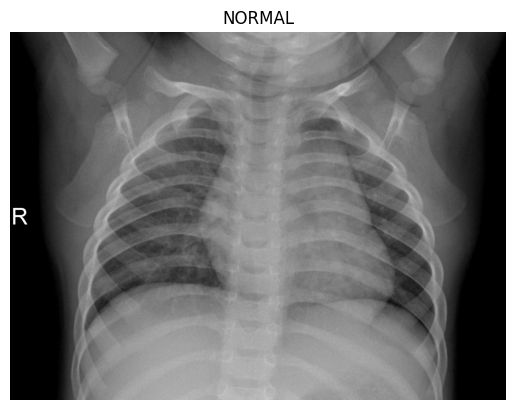

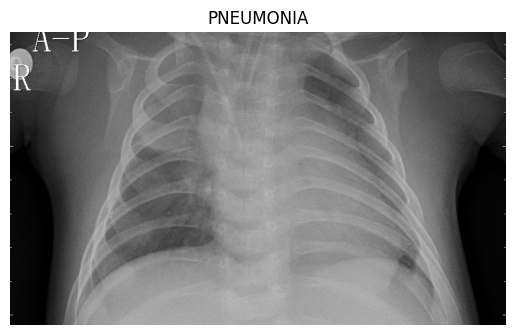

PNEUMONIA


In [ ]:
pneumonia_dir = '/content/chest_xray/train/PNEUMONIA'
normal_dir = '/content/chest_xray/train/NORMAL'

pneumonialistTrain = os.listdir('/content/chest_xray/train/PNEUMONIA')
normallistTrain = os.listdir('/content/chest_xray/train/NORMAL')

#Presenting the first image of healthy lungs
imgNor = plt.imread(os.path.join(normal_dir, normallistTrain[4]))
plt.title("NORMAL")
plt.imshow(imgNor, 'gray')
plt.axis("off")
plt.show()

print("================================================================")

#Presenting the first image of sick lungs
imgPne = plt.imread(os.path.join(pneumonia_dir, pneumonialistTrain[4]))
plt.title("PNEUMONIA")
plt.imshow(imgPne, 'gray')
plt.axis("off")
plt.show()
print("PNEUMONIA")


###**Try 1**

####**Data Preprocessing**
Setting up an ImageGenerator with transformations, this will help us avoid overfitting, and will enlarge our dataset with artificial samples.

In [ ]:
trainDG = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
)

valiDG = ImageDataGenerator(
    rescale=1 / 255.0,
    validation_split=0.2
)

testDG = ImageDataGenerator(
    rescale=1 / 255.0
)

Importing the images from the two directories.
We set up the images to be 224x224x1.

In [ ]:
train = trainDG.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='grayscale',
    class_mode='binary',
    shuffle=True,
    subset='training',
)

validation = valiDG.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False,
    batch_size=1,
    subset='validation',
)

test = testDG.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False,
    batch_size=1
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**Our data is imbalanced between NORMAL and PNEUMONIA cases.
The following chart presents the differences in the samples**

1073


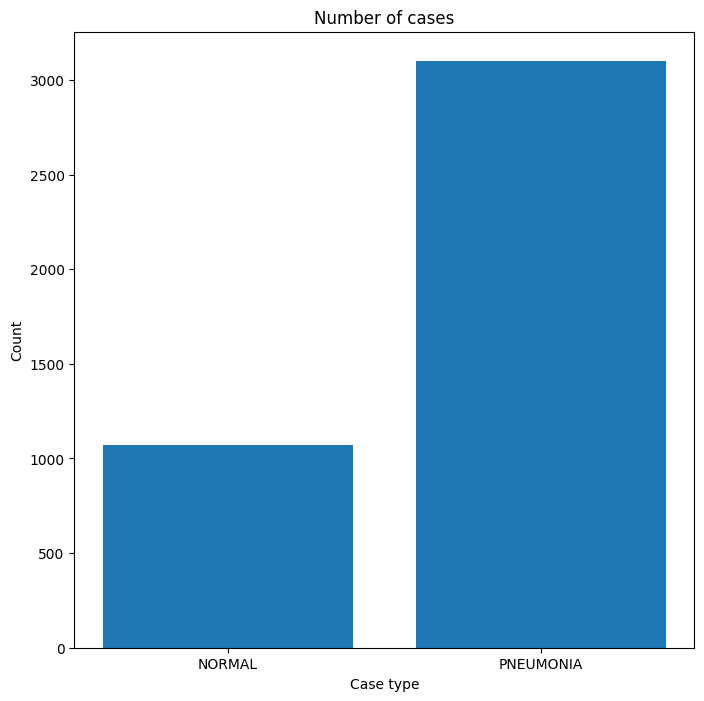

In [ ]:
from collections import Counter
labels = train.labels
label_counts = Counter(labels)
counts = {class_name: count for class_name, count in label_counts.items()}


#Plotting the chart
plt.figure(figsize=(8, 8))
plt.bar(range(len(counts)),counts.values(), tick_label=('NORMAL', 'PNEUMONIA'))
plt.title('Number of cases')
plt.xlabel('Case type')
plt.ylabel('Count')
plt.show()

####Build The network layers

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(224, 224, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='relu'))


####Build The Optimizer

In [ ]:
from keras.optimizers import Adam
opt = Adam(0.0007)

####Compile the model

In [ ]:
model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                        

####Training

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train, epochs=10, validation_data=validation,verbose=1, callbacks=[callback])

Epoch 1/10
131/131 [==============================] - 52s 324ms/step - loss: 3.9845 - accuracy: 0.7386 - val_loss: 3.9183 - val_accuracy: 0.7430
Epoch 2/10
131/131 [==============================] - 43s 326ms/step - loss: 3.9210 - accuracy: 0.7429 - val_loss: 3.9183 - val_accuracy: 0.7430
Epoch 3/10
131/131 [==============================] - 42s 324ms/step - loss: 3.9210 - accuracy: 0.7429 - val_loss: 3.9183 - val_accuracy: 0.7430
Epoch 4/10
131/131 [==============================] - 43s 328ms/step - loss: 3.9210 - accuracy: 0.7429 - val_loss: 3.9183 - val_accuracy: 0.7430
Epoch 5/10
131/131 [==============================] - 43s 326ms/step - loss: 3.9210 - accuracy: 0.7429 - val_loss: 3.9183 - val_accuracy: 0.7430


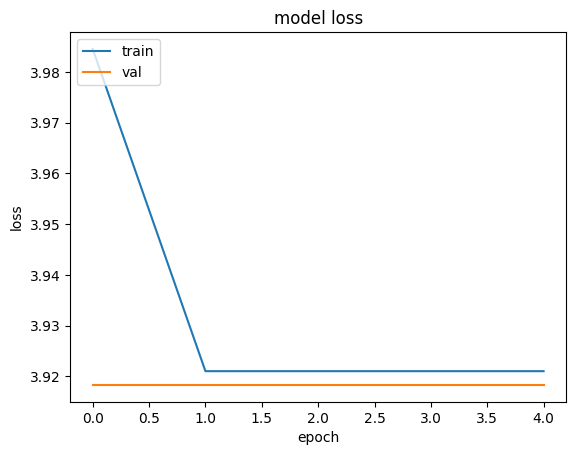

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

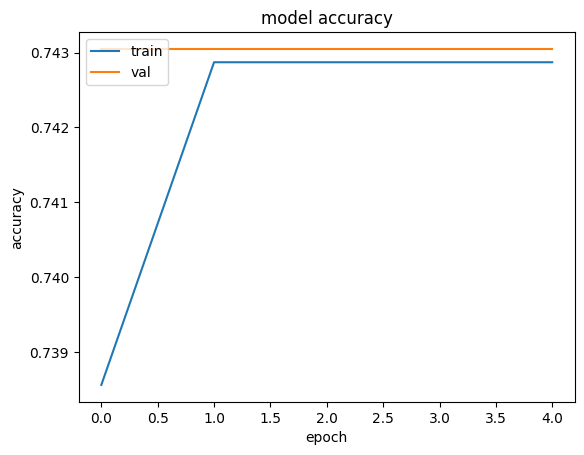

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####Test the model

In [ ]:
eval = model.evaluate(test)
print(f"Test Accuracy: {eval[1] * 100:.2f}%")

624/624 [==============================] - 3s 5ms/step - loss: 5.7185 - accuracy: 0.6250
Test Accuracy: 62.50%


###Try 2

####Data Preprocessing

Setting up an ImageGenerator with transformations, this will help us avoid overfitting, and will enlarge our dataset with artificial samples.
in this try, we will set the batch size to 16 with the same 80% 20% ratio.
Using EfficientNetB3, with pretrained IMAGENET weights

In [ ]:
trainDG = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
)

valiDG = ImageDataGenerator(
    rescale=1 / 255.0,
    validation_split=0.2
)

testDG = ImageDataGenerator(
    rescale=1 / 255.0
)

Importing the images from the two directories.
We set up the images to be 224x224x3. Using categorical form to match imagenet training weights.

In [ ]:
train = trainDG.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset='training',
    batch_size=16,
)

validation = valiDG.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    batch_size=16,
    subset='validation',
)

test = testDG.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    batch_size=16
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**Our data is imbalanced between NORMAL and PNEUMONIA cases.
The following chart presents the differences in the samples**

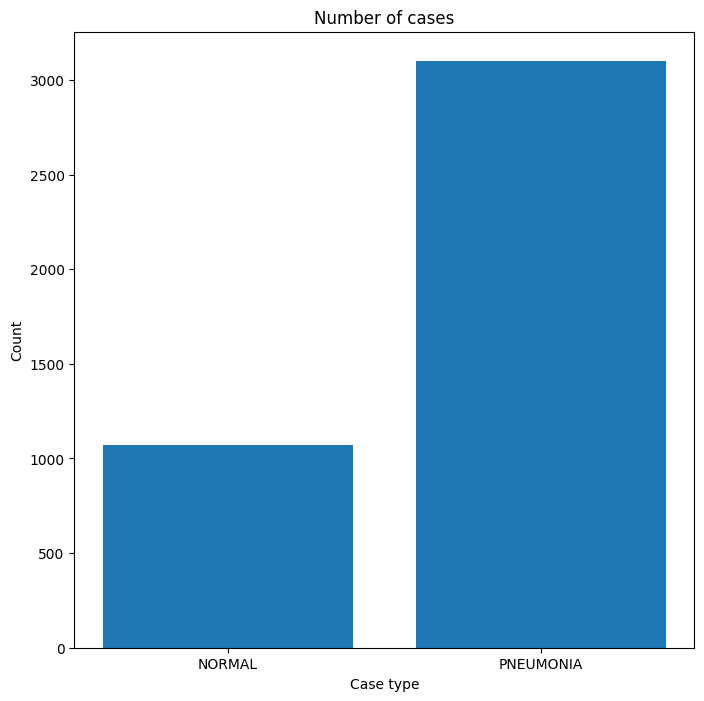

In [ ]:
from collections import Counter
labels = train.labels
label_counts = Counter(labels)
counts = {class_name: count for class_name, count in label_counts.items()}

#Plotting the chart
plt.figure(figsize=(8, 8))
plt.bar(range(len(counts)),counts.values(), tick_label=('NORMAL', 'PNEUMONIA'))
plt.title('Number of cases')
plt.xlabel('Case type')
plt.ylabel('Count')
plt.show()

####Build The network layers

In [ ]:
from keras import regularizers

base_model = keras.applications.efficientnet.EfficientNetB3(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')

model = Sequential()

model.add(base_model)
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
model.add(Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) , activation='relu'))
model.add(Dropout(rate=0.4, seed=75))
model.add(Dense(2, activation='softmax'))

43941136/43941136 [==============================] - 3s 0us/step


Freezing all the pretrained layers.

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

####Build The Optimizer

In [ ]:
from keras.optimizers import Adamax
opt = Adamax(0.00001)

####Compile the model

In [ ]:
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization_4 (Bat  (None, 1536)              6144      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 256)               393472    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 11183665 (42.66 MB)
Trainable params: 39

####Training

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
history = model.fit(train, epochs=10, validation_data=validation,verbose=1, callbacks=[callback])

Epoch 1/10
261/261 [==============================] - 97s 324ms/step - loss: 8.5378 - accuracy: 0.5835 - val_loss: 7.7903 - val_accuracy: 0.7430
Epoch 2/10
261/261 [==============================] - 82s 315ms/step - loss: 8.2833 - accuracy: 0.6298 - val_loss: 7.7246 - val_accuracy: 0.4612
Epoch 3/10
261/261 [==============================] - 82s 315ms/step - loss: 8.1292 - accuracy: 0.6523 - val_loss: 7.6379 - val_accuracy: 0.6357
Epoch 4/10
261/261 [==============================] - 83s 316ms/step - loss: 7.9822 - accuracy: 0.6655 - val_loss: 7.5247 - val_accuracy: 0.7862
Epoch 5/10
261/261 [==============================] - 82s 314ms/step - loss: 7.8543 - accuracy: 0.6772 - val_loss: 7.4476 - val_accuracy: 0.7804
Epoch 6/10
261/261 [==============================] - 83s 317ms/step - loss: 7.7461 - accuracy: 0.6868 - val_loss: 7.3561 - val_accuracy: 0.7987
Epoch 7/10
261/261 [==============================] - 83s 317ms/step - loss: 7.6194 - accuracy: 0.6945 - val_loss: 7.2661 - val_ac

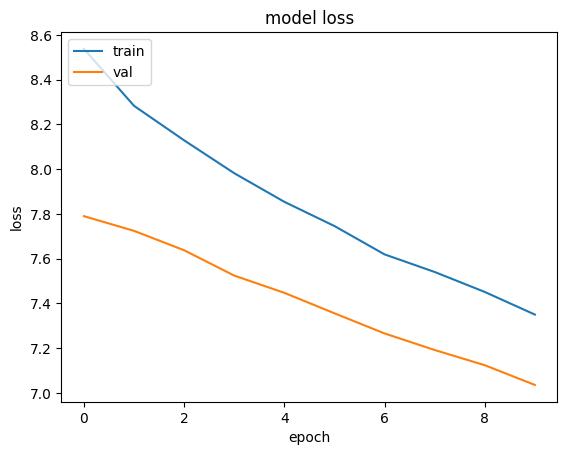

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

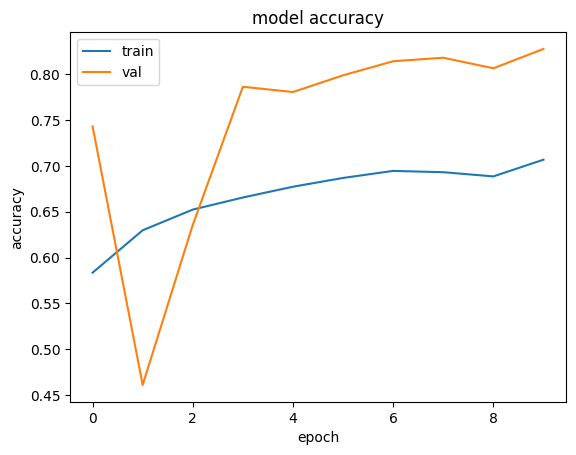

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####Test the model

In [ ]:
eval = model.evaluate(test)
print(f"Test Accuracy: {eval[1] * 100:.2f}%")

39/39 [==============================] - 5s 117ms/step - loss: 7.0801 - accuracy: 0.7115
Test Accuracy: 71.15%


###Try 2.1

####Build The network layers

In this attempt, we will use the architecture of VGG16 with pretrained weights from IMAGENET.

In [ ]:
from keras import regularizers

base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')

model = Sequential()

model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) , activation='relu'))
model.add(Dropout(rate=0.4, seed=75))
model.add(Dense(2, activation='softmax'))

Freezing all the pretrained layers

In [ ]:
#Freezing the trained layers
for layer in base_model.layers:
    layer.trainable = False

####Build The Optimizer

In [ ]:
from keras.optimizers import Adamax
opt = Adamax(0.0001)

####Compile the model

In [ ]:
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_9 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 2)                 514       
                                                                 
Total params: 14848578 (56.64 MB)
Trainable params: 132866 (519.01 KB)
Non-trainable params: 14715712 (56.14 MB)
_______

####Training

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
history = model.fit(train, epochs=10, validation_data=validation,verbose=1, callbacks=[callback])

Epoch 1/10
261/261 [==============================] - 83s 314ms/step - loss: 6.2093 - accuracy: 0.7426 - val_loss: 5.5655 - val_accuracy: 0.8063
Epoch 2/10
261/261 [==============================] - 81s 312ms/step - loss: 5.4073 - accuracy: 0.8325 - val_loss: 5.1156 - val_accuracy: 0.8428
Epoch 3/10
261/261 [==============================] - 82s 313ms/step - loss: 4.8338 - accuracy: 0.8672 - val_loss: 4.6540 - val_accuracy: 0.8667
Epoch 4/10
261/261 [==============================] - 81s 312ms/step - loss: 4.3683 - accuracy: 0.8773 - val_loss: 4.2255 - val_accuracy: 0.8811
Epoch 5/10
261/261 [==============================] - 81s 311ms/step - loss: 3.9820 - accuracy: 0.8855 - val_loss: 3.8665 - val_accuracy: 0.8811
Epoch 6/10
261/261 [==============================] - 80s 308ms/step - loss: 3.6497 - accuracy: 0.8912 - val_loss: 3.5724 - val_accuracy: 0.8849
Epoch 7/10
261/261 [==============================] - 81s 312ms/step - loss: 3.3813 - accuracy: 0.8900 - val_loss: 3.3163 - val_ac

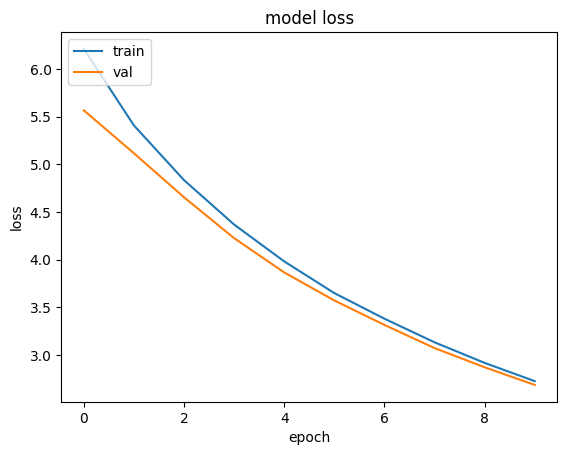

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

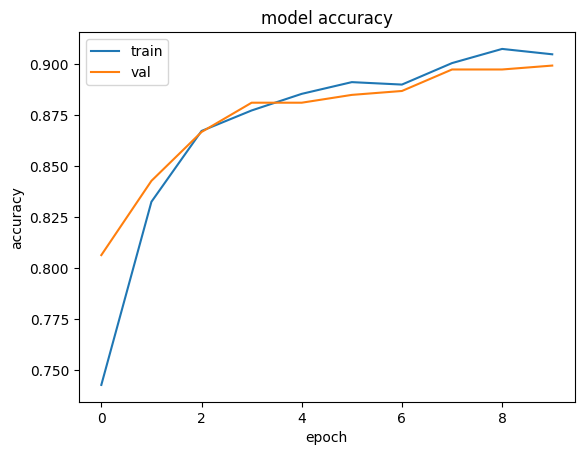

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####Test the model

In [ ]:
eval = model.evaluate(test)
print(f"Test Accuracy: {eval[1] * 100:.2f}%")

39/39 [==============================] - 5s 113ms/step - loss: 2.7562 - accuracy: 0.8846
Test Accuracy: 88.46%


###Try 2.1.1

####Rebuild the model


####Rebuild the network layers

Freezing all layers besides the last 5

In [ ]:
#Freezing the trained layers
for layer in base_model.layers:
    layer.trainable = True
for layer in base_model.layers[:-3]:
    layer.trainable = False

####Build The Optimizer

In [ ]:
from keras.optimizers import Adamax
opt = Adamax(0.00001)

####Compile the model

In [ ]:
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_10 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense_15 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 24646018 (94.02 MB)
Trainable params: 1054210 (4.02 MB)
Non-trainable params: 23591808 (90.00 MB)
________

####Training

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
history = model.fit(train, epochs=10, validation_data=validation,verbose=1, callbacks=[callback])

Epoch 1/10
261/261 [==============================] - 83s 313ms/step - loss: 2.6105 - accuracy: 0.9113 - val_loss: 2.6671 - val_accuracy: 0.8993
Epoch 2/10
261/261 [==============================] - 82s 315ms/step - loss: 2.5873 - accuracy: 0.9099 - val_loss: 2.6531 - val_accuracy: 0.8965
Epoch 3/10
261/261 [==============================] - 82s 314ms/step - loss: 2.5717 - accuracy: 0.9116 - val_loss: 2.6276 - val_accuracy: 0.8984
Epoch 4/10
261/261 [==============================] - 83s 317ms/step - loss: 2.5497 - accuracy: 0.9183 - val_loss: 2.6065 - val_accuracy: 0.9003
Epoch 5/10
261/261 [==============================] - 82s 316ms/step - loss: 2.5299 - accuracy: 0.9118 - val_loss: 2.5962 - val_accuracy: 0.9012
Epoch 6/10
261/261 [==============================] - 82s 314ms/step - loss: 2.5066 - accuracy: 0.9214 - val_loss: 2.5794 - val_accuracy: 0.8993
Epoch 7/10
261/261 [==============================] - 83s 316ms/step - loss: 2.4803 - accuracy: 0.9190 - val_loss: 2.5441 - val_ac

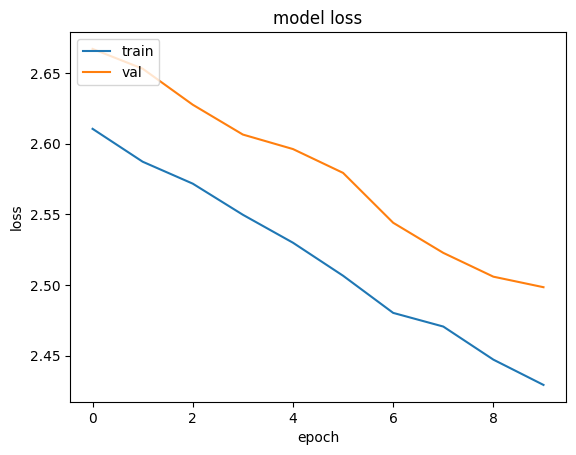

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

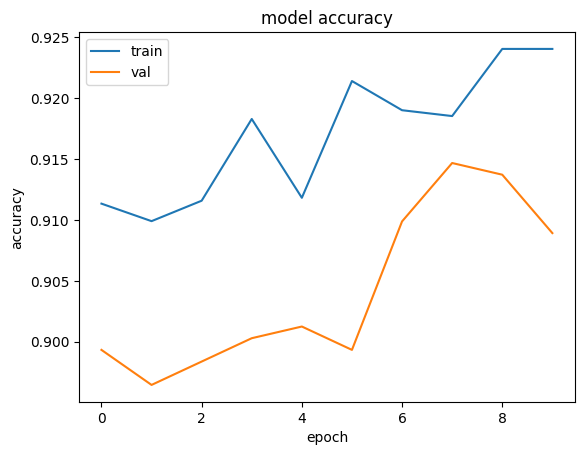

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####Test the model

In [ ]:
eval = model.evaluate(test)
print(f"Test Accuracy: {eval[1] * 100:.2f}%")

39/39 [==============================] - 5s 112ms/step - loss: 2.5472 - accuracy: 0.9006
Test Accuracy: 90.06%


####Saving the models weights

In [ ]:
model.save('/content/drive/MyDrive/saved_models/chestXray')

In [ ]:
#load the saved model
loaded_model = keras.models.load_model('/content/drive/MyDrive/saved_models/chestXray/model')

loaded_model.save('/content/drive/MyDrive/saved_models/chestXray/weights/singleclassChestXray.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Try 3

####Build The network layers

In [ ]:
from keras import regularizers

base_model = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max', classes=2)

model = Sequential()

model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(512, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) , activation='relu'))
model.add(Dropout(rate=0.4, seed=75))
model.add(Dense(2, activation='softmax'))

####Rebuild the model


Freezing all the layers

In [ ]:
#Freezing the trained layers
for layer in base_model.layers:
    layer.trainable = False

####Build The Optimizer

In [ ]:
from keras.optimizers import Adamax
opt = Adamax(0.00001)

####Compile the model

In [ ]:
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_15 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense_25 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 24646018 (94.02 MB)
Trainable params: 1054210 (4.02 MB)
Non-trainable params: 23591808 (90.00 MB)
_______

####Training

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
history = model.fit(train, epochs=10, validation_data=validation,verbose=1, callbacks=[callback])

Epoch 1/10
261/261 [==============================] - 88s 320ms/step - loss: 13.8558 - accuracy: 0.6384 - val_loss: 13.2460 - val_accuracy: 0.4401
Epoch 2/10
261/261 [==============================] - 82s 313ms/step - loss: 12.4885 - accuracy: 0.7534 - val_loss: 11.8643 - val_accuracy: 0.7737
Epoch 3/10
261/261 [==============================] - 82s 316ms/step - loss: 11.3849 - accuracy: 0.7810 - val_loss: 10.9015 - val_accuracy: 0.8035
Epoch 4/10
261/261 [==============================] - 83s 318ms/step - loss: 10.4303 - accuracy: 0.7965 - val_loss: 10.0314 - val_accuracy: 0.8178
Epoch 5/10
261/261 [==============================] - 82s 314ms/step - loss: 9.5710 - accuracy: 0.8188 - val_loss: 9.2303 - val_accuracy: 0.8284
Epoch 6/10
261/261 [==============================] - 83s 319ms/step - loss: 8.8413 - accuracy: 0.8229 - val_loss: 8.5329 - val_accuracy: 0.8456
Epoch 7/10
261/261 [==============================] - 83s 317ms/step - loss: 8.1879 - accuracy: 0.8399 - val_loss: 7.9338 

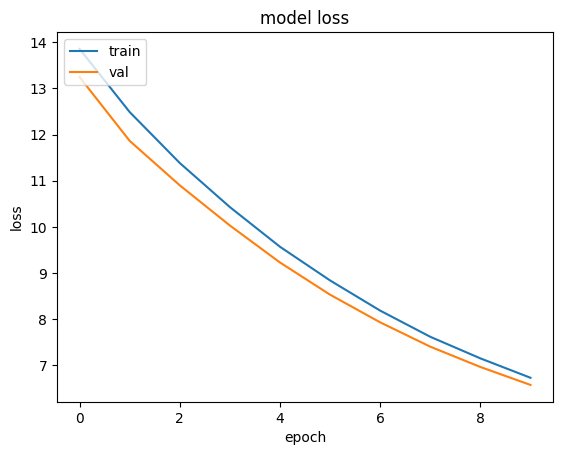

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

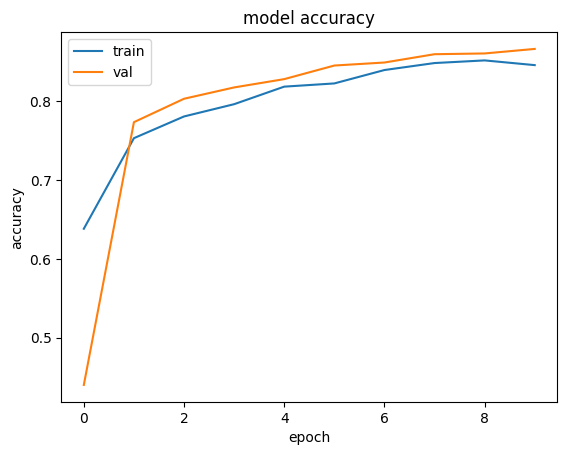

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####Test the model

In [ ]:
eval = model.evaluate(test)
print(f"Test Accuracy: {eval[1] * 100:.2f}%")

39/39 [==============================] - 5s 114ms/step - loss: 6.5860 - accuracy: 0.8574
Test Accuracy: 85.74%


###Test Environment

This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

In [ ]:
file_id = '1M4bitQbWb5Zx7n8_Vnsadm4JdN8QD5wZ'
dest = '/content/drive/MyDrive/singleclassChestXray.h5'

!gdown --id $file_id -O $dest

In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/singleclassChestXray.h5')

####Single Prediction

Using the best model with 90.06% accuracy

In [ ]:
from numpy import load as load_npy
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving person1000_bacteria_2931.jpeg to person1000_bacteria_2931.jpeg
User uploaded file "person1000_bacteria_2931.jpeg" with length 69942 bytes


In [ ]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.applications.vgg16 import preprocess_input

classify = ['NORMAL', 'PNEUMONIA']

filename = next(iter(uploaded))

img = load_img(os.path.join('/content', filename), target_size=(224, 224))
img = img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

result = test_model.predict(img)

print(f"{np.argmax(result[0])} {classify[np.argmax(result[0])]}")

1/1 [==============================] - 0s 22ms/step
1 PNEUMONIA


##A.MultiClass Classifier

inside our dataset, PNEUMONIA folder have two different types of images

<table>
  <tr>
    <th>Types</th>
  </tr>
  <tr>
    <td>Bacteria</td>
  </tr>
  <tr>
    <td>Virus</td>
  </tr>
</table

###Setting up the data

Currently, a big portion of our data is mixed up in one folder. We are going to extract each category to an individual folder.

Importing relevant libraries for this section.

In [ ]:
import shutil

Setting up the folders.

In [ ]:
multiclass_dir = '/content/chest_xray/multiclassifier'

#Creating multiclass folder
os.makedirs(multiclass_dir, exist_ok=True)

#For train
multiclass_train_dir = os.path.join(multiclass_dir, 'train')
pneumonia_train_dir = '/content/chest_xray/train/PNEUMONIA'
normal_train_dir = '/content/chest_xray/train/NORMAL'


#Creating train folder with two sub folders
os.makedirs(multiclass_train_dir, exist_ok=True)
os.makedirs(os.path.join(multiclass_train_dir, 'VIRUS'), exist_ok=True)
os.makedirs(os.path.join(multiclass_train_dir, 'BACTERIA'), exist_ok=True)
os.makedirs(os.path.join(multiclass_train_dir, 'NORMAL'), exist_ok=True)

for filename in os.listdir(pneumonia_train_dir):
  if 'virus' in filename:
    shutil.copy(os.path.join(pneumonia_train_dir, filename), os.path.join(os.path.join(multiclass_train_dir, 'VIRUS'), filename))
  elif 'bacteria' in filename:
    shutil.copy(os.path.join(pneumonia_train_dir, filename), os.path.join(os.path.join(multiclass_train_dir, 'BACTERIA'), filename))

for filename in os.listdir(normal_train_dir):
  shutil.copy(os.path.join(normal_train_dir, filename), os.path.join(os.path.join(multiclass_train_dir, 'NORMAL'), filename))


#For test
multiclass_test_dir = os.path.join(multiclass_dir, 'test')
pneumonia_test_dir = '/content/chest_xray/test/PNEUMONIA'
normal_test_dir = '/content/chest_xray/test/NORMAL'

#Creating test folder with two sub folders
os.makedirs(multiclass_test_dir, exist_ok=True)
os.makedirs(os.path.join(multiclass_test_dir, 'VIRUS'), exist_ok=True)
os.makedirs(os.path.join(multiclass_test_dir, 'BACTERIA'), exist_ok=True)
os.makedirs(os.path.join(multiclass_test_dir, 'NORMAL'), exist_ok=True)

for filename in os.listdir(pneumonia_test_dir):
  if 'virus' in filename:
    shutil.copy(os.path.join(pneumonia_test_dir, filename), os.path.join(os.path.join(multiclass_test_dir, 'VIRUS'), filename))
  elif 'bacteria' in filename:
    shutil.copy(os.path.join(pneumonia_test_dir, filename), os.path.join(os.path.join(multiclass_test_dir, 'BACTERIA'), filename))

for filename in os.listdir(normal_test_dir):
  shutil.copy(os.path.join(normal_test_dir, filename), os.path.join(os.path.join(multiclass_test_dir, 'NORMAL'), filename))



###Presenting the data for each folder of pictures.

In [ ]:
multiclassifier_dir = '/content/chest_xray/multiclassifier'
train_dir = os.path.join(multiclassifier_dir, 'train')
test_dir = os.path.join(multiclassifier_dir, 'test')

print('Train Set:\n')

print(f"PNEUMONIA BACTERIA={len(os.listdir(os.path.join(multiclassifier_dir, os.path.join('train', 'BACTERIA'))))}")
print(f"PNEUMONIA VIRUS={len(os.listdir(os.path.join(multiclassifier_dir, os.path.join('train', 'VIRUS'))))}")
print(f"NORMAL={len(os.listdir(os.path.join(os.path.join(multiclassifier_dir, 'train'), 'NORMAL')))}")
print('==============================================')

print('Test Set:\n')

print(f"PNEUMONIA BACTERIA={len(os.listdir(os.path.join(multiclassifier_dir, os.path.join('test', 'BACTERIA'))))}")
print(f"PNEUMONIA BACTERIA={len(os.listdir(os.path.join(multiclassifier_dir, os.path.join('test', 'VIRUS'))))}")
print(f"NORMAL={len(os.listdir(os.path.join(os.path.join(multiclassifier_dir, 'test'), 'NORMAL')))}")
print('==============================================')

Train Set:

PNEUMONIA BACTERIA=2530
PNEUMONIA VIRUS=1345
NORMAL=1341
Test Set:

PNEUMONIA BACTERIA=242
PNEUMONIA BACTERIA=148
NORMAL=234


###Presenting an example of BACTERIA compared to VIRUS

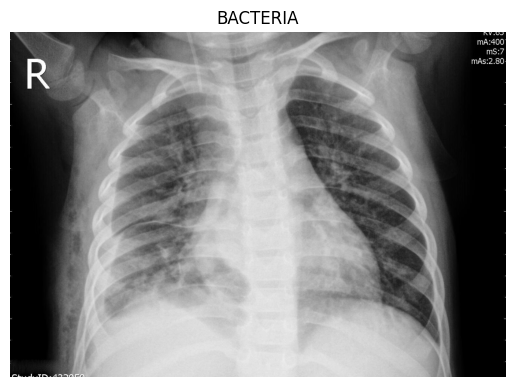

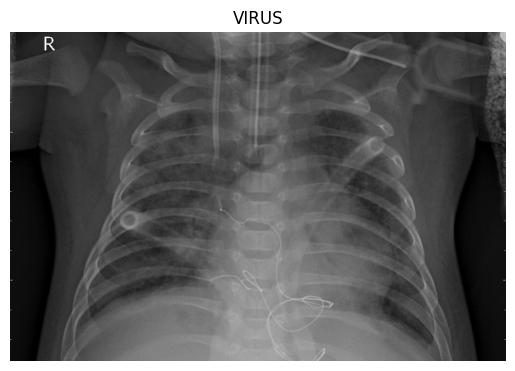

In [ ]:
bacteria_dir = '/content/chest_xray/multiclassifier/train/BACTERIA'
virus_dir = '/content/chest_xray/multiclassifier/train/VIRUS'

bacteriaListTrain = os.listdir('/content/chest_xray/multiclassifier/train/BACTERIA')
virusListTrain = os.listdir('/content/chest_xray/multiclassifier/train/VIRUS')

#Presenting the first image of bacteria lungs
imgNor = plt.imread(os.path.join(bacteria_dir, bacteriaListTrain[0]))
plt.title("BACTERIA")
plt.imshow(imgNor, 'gray')
plt.axis("off")
plt.show()

print("================================================================")

#Presenting the first image of virus lungs
imgPne = plt.imread(os.path.join(virus_dir, virusListTrain[0]))
plt.title("VIRUS")
plt.imshow(imgPne, 'gray')
plt.axis("off")
plt.show()

###Try 1

####Data preprocessing

Setting up an ImageGenerator with transformations, this will help us avoid overfitting, and will enlarge our dataset with artificial samples.

In [ ]:
trainDG = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
)

valiDG = ImageDataGenerator(
    rescale=1 / 255.0,
    validation_split=0.2
)

Importing the images from the two directories.
We set up the images to be 224x224x1.

In [ ]:
train = trainDG.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset='training',
    batch_size=16,
)

validation = valiDG.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    batch_size=16,
    subset='validation',
)

test = valiDG.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    batch_size=16
)

Found 4173 images belonging to 3 classes.
Found 1043 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


Displaying a graph representing the difference in quantity between the three classes.

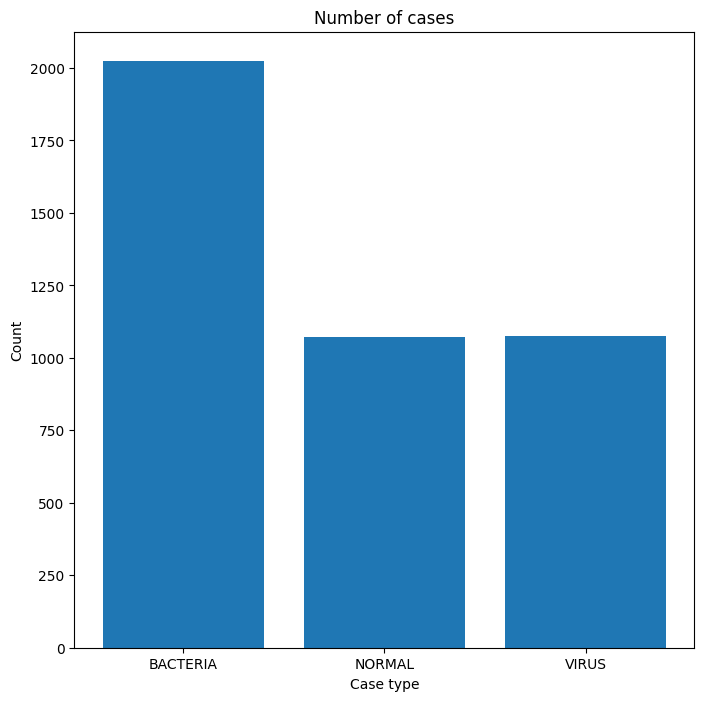

In [ ]:
from collections import Counter
labels = train.labels
label_counts = Counter(labels)
counts = {class_name: count for class_name, count in label_counts.items()}

#Plotting the chart
plt.figure(figsize=(8, 8))
plt.bar(range(len(counts)),counts.values(), tick_label=('BACTERIA', 'NORMAL', 'VIRUS'))
plt.title('Number of cases')
plt.xlabel('Case type')
plt.ylabel('Count')
plt.show()

####Build the network layers

Building on top of the best model from the previous section, we decided to add another fully connected layer to catch more features and get a better accuracy.

In [ ]:
from keras import regularizers

base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')

model = Sequential()

model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) , activation='relu'))
model.add(Dropout(rate=0.4, seed=75))
model.add(Dense(128, kernel_regularizer=regularizers.l2(l=0.021), activity_regularizer=regularizers.l1(0.009),
                bias_regularizer=regularizers.l1(0.009) , activation='relu'))
model.add(Dense(3, activation='softmax'))

Freezing all the pretrained layers.

In [ ]:
#Freezing the trained layers
for layer in base_model.layers:
    layer.trainable = False

####Build the optimizer

In [ ]:
from keras.optimizers import Adamax
opt = Adamax(0.001)

####Compile the model

In [ ]:
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 3)                 387       
                                                      

####Training

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
history = model.fit(train, epochs=10, validation_data=validation,verbose=1, callbacks=[callback])

Epoch 1/10
261/261 [==============================] - 90s 338ms/step - loss: 7.8873 - accuracy: 0.6614 - val_loss: 5.7827 - val_accuracy: 0.6721
Epoch 2/10
261/261 [==============================] - 87s 333ms/step - loss: 4.6151 - accuracy: 0.7235 - val_loss: 3.5877 - val_accuracy: 0.7124
Epoch 3/10
261/261 [==============================] - 87s 332ms/step - loss: 2.8080 - accuracy: 0.7455 - val_loss: 2.2535 - val_accuracy: 0.7267
Epoch 4/10
261/261 [==============================] - 85s 327ms/step - loss: 1.7835 - accuracy: 0.7632 - val_loss: 1.4966 - val_accuracy: 0.7488
Epoch 5/10
261/261 [==============================] - 87s 333ms/step - loss: 1.2805 - accuracy: 0.7625 - val_loss: 1.1926 - val_accuracy: 0.7315
Epoch 6/10
261/261 [==============================] - 87s 335ms/step - loss: 1.0281 - accuracy: 0.7611 - val_loss: 1.0322 - val_accuracy: 0.7296
Epoch 7/10
261/261 [==============================] - 87s 332ms/step - loss: 0.8908 - accuracy: 0.7743 - val_loss: 0.9200 - val_ac

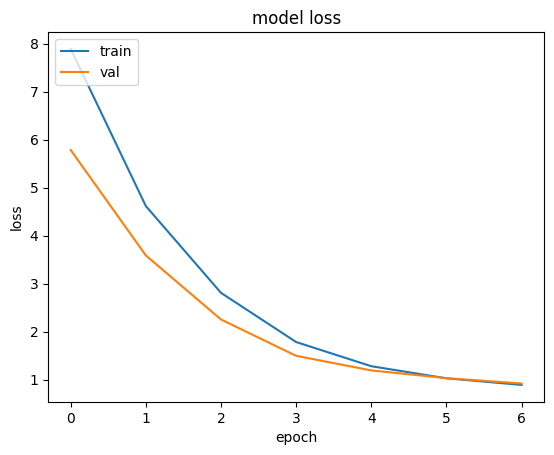

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

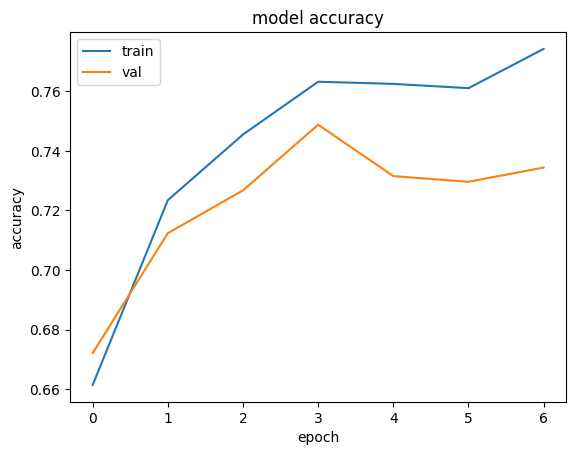

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####Test the model

In [ ]:
eval = model.evaluate(test)
print(f"Test Accuracy: {eval[1] * 100:.2f}%")

39/39 [==============================] - 5s 122ms/step - loss: 1.4273 - accuracy: 0.8285
Test Accuracy: 82.85%


####Saving the model

In [ ]:
model.save('/content/drive/MyDrive/saved_models/multiclassChestXray/model')

Save the weights

In [ ]:
model.save('/content/drive/MyDrive/saved_models/multiclassChestXray/weights/multiclassChestXray.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Try 2

####Building the network layers

Retaining model configurations from our previous experiment.
Unfreezing the last 3 layers, helping the pretrained model to fit better.

In [ ]:
#Freezing the trained layers
for layer in base_model.layers:
    layer.trainable = True
for layer in base_model.layers[:-2]:
    layer.trainable = False

####Build the optimizer

In [ ]:
from keras.optimizers import Adamax
opt = Adamax(0.001)

####Compile the model

In [ ]:
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                      

####Training

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
history = model.fit(train, epochs=10, validation_data=validation,verbose=1, callbacks=[callback])

Epoch 1/10
261/261 [==============================] - 89s 334ms/step - loss: 1.0860 - accuracy: 0.7625 - val_loss: 1.0343 - val_accuracy: 0.7344
Epoch 2/10
261/261 [==============================] - 86s 328ms/step - loss: 0.9192 - accuracy: 0.7611 - val_loss: 0.9586 - val_accuracy: 0.7258
Epoch 3/10
261/261 [==============================] - 88s 336ms/step - loss: 0.8473 - accuracy: 0.7596 - val_loss: 0.8789 - val_accuracy: 0.7373
Epoch 4/10
261/261 [==============================] - 89s 339ms/step - loss: 0.8120 - accuracy: 0.7680 - val_loss: 0.8768 - val_accuracy: 0.7373
Epoch 5/10
261/261 [==============================] - 88s 338ms/step - loss: 0.7822 - accuracy: 0.7690 - val_loss: 0.8374 - val_accuracy: 0.7430
Epoch 6/10
261/261 [==============================] - 88s 339ms/step - loss: 0.7689 - accuracy: 0.7699 - val_loss: 0.8292 - val_accuracy: 0.7344
Epoch 7/10
261/261 [==============================] - 87s 334ms/step - loss: 0.7399 - accuracy: 0.7764 - val_loss: 0.8227 - val_ac

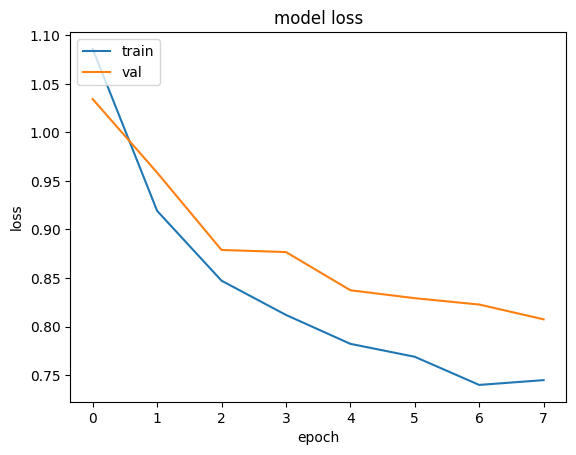

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

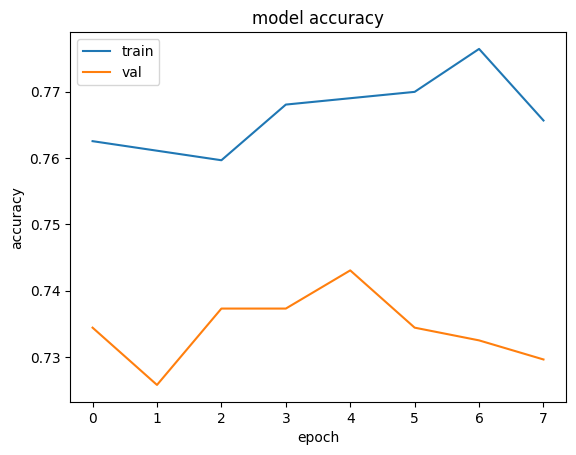

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####Test your model

In [ ]:
eval = model.evaluate(test)
print(f"Test Accuracy: {eval[1] * 100:.2f}%")

39/39 [==============================] - 5s 126ms/step - loss: 0.7272 - accuracy: 0.8221
Test Accuracy: 82.21%


###Test Environment

This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below. (If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

In [ ]:
file_id = '10n3C1RVrhA5jexrOJYf-wc4G88BTEi3k'
dest = '/content/drive/MyDrive/multiclassChestXray.h5''

!gdown --id $file_id -O $dest

In [ ]:
test_model_multi = keras.models.load_model('/content/drive/MyDrive/multiclassChestXray.h5')

####Single prediction

In [ ]:
from numpy import load as load_npy
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving person100_bacteria_478.jpeg to person100_bacteria_478.jpeg
User uploaded file "person100_bacteria_478.jpeg" with length 56060 bytes


In [ ]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.applications.vgg16 import preprocess_input

classify = ['BACTERIA','NORMAL', 'VIRUS']

filename = next(iter(uploaded))

img = load_img(os.path.join('/content', filename), target_size=(224, 224))
img = img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

result = test_model.predict(img)

print(f"{np.argmax(result[0])} {classify[np.argmax(result[0])]}")

1/1 [==============================] - 0s 19ms/step
1 NORMAL


##B.Classifying with KNN

###Binary Classification Embedding Vector Extraction.

####Load data

In [ ]:
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'

trainDG = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
)

testDG = ImageDataGenerator(
    rescale=1 / 255.0,
    validation_split=0.2
)

Importing the images for the ImageDataGenerator

In [ ]:
train = trainDG.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset='training',
    batch_size=16,
)

test = testDG.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    batch_size=16
)

y_train = train.classes
y_test = test.classes

Found 4173 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


####Load the model

We will load the weights of our best mode.

In [ ]:
best_binary = keras.models.load_model('/content/drive/MyDrive/singleclassChestXray.h5')

Extracting the dense layer output

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

for layer in reversed(best_binary.layers):
  if layer.trainable_weights:
    last_embedding = layer
    break;

embedding_model = keras.Model(inputs=best_binary.input, outputs=last_embedding.output)


train_embedding = embedding_model.predict(train, steps=len(train))
test_embedding = embedding_model.predict(test, steps=len(test))
train_embedding = train_embedding.reshape(train_embedding.shape[0], -1)
test_embedding = test_embedding.reshape(test_embedding.shape[0], -1)



39/39 [==============================] - 6s 161ms/step


In [ ]:
knn = KNN(n_neighbors=26)
knn.fit(train_embedding, y_train)

knn_predictions = knn.predict(test_embedding)

accuracy = knn.score(test_embedding, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6266025641025641


####Visualizing The Data

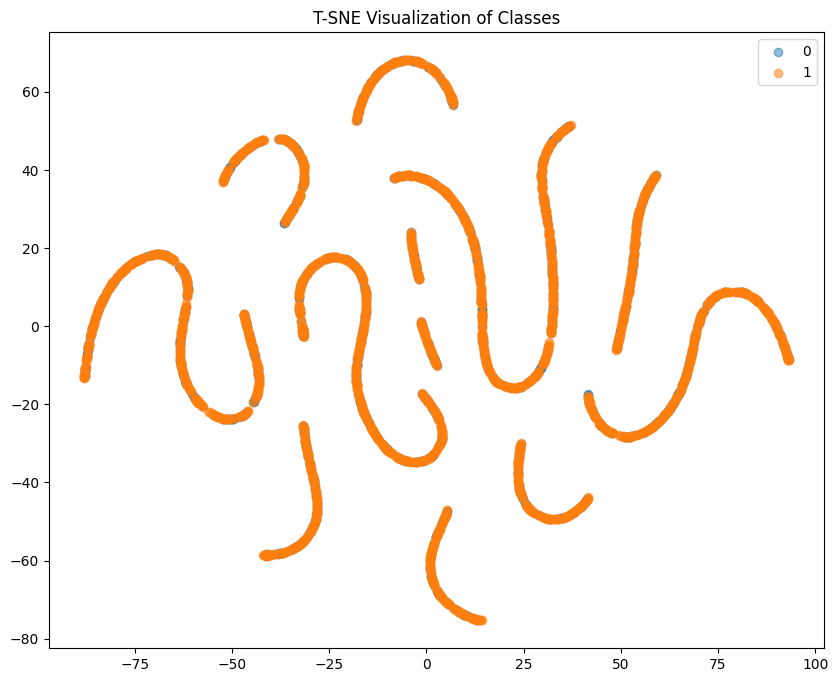

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
train_embeddings_tsne = tsne.fit_transform(train_embedding)

plt.figure(figsize=(10, 8))
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(train_embeddings_tsne[indices, 0], train_embeddings_tsne[indices, 1], label=label, alpha=0.5)
plt.legend()
plt.title('T-SNE Visualization of Classes')
plt.show()

####Upload Image

In [ ]:
from numpy import load as load_npy
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving IM-0115-0001.jpeg to IM-0115-0001.jpeg
User uploaded file "IM-0115-0001.jpeg" with length 870784 bytes


Getting the result

In [ ]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.applications.vgg16 import preprocess_input

classify = ['NORMAL', 'PNEUMONIA']

filename = next(iter(uploaded))

img = load_img(os.path.join('/content', filename), target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

embedding_result = embedding_model.predict(img)

result = knn.predict(embedding_result)

print(f"{np.argmax(result[0])} {classify[np.argmax(result[0])]}")

1/1 [==============================] - 0s 21ms/step
0 NORMAL


###Multiclass Classification Embedding Vector Extraction.

####Load Data

In [ ]:
train_dir = '/content/chest_xray/multiclassifier/train'
test_dir = '/content/chest_xray/multiclassifier/test'


trainDG = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
)

testDG = ImageDataGenerator(
    rescale=1 / 255.0,
    validation_split=0.2
)

Importing the images for the ImageDataGenerator

In [ ]:
train = trainDG.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset='training',
    batch_size=16,
)

test = testDG.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    batch_size=16
)

y_train = train.classes
y_test = test.classes

Found 4173 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


####Load the model

We will load the weights of our best model

In [ ]:
best_multi = keras.models.load_model('/content/drive/MyDrive/multiclassChestXray.h5')

Extracting the dense layer output

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

for layer in reversed(best_multi.layers):
  if layer.trainable_weights:
    last_embedding = layer
    break;

embedding_model = keras.Model(inputs=best_multi.input, outputs=last_embedding.output)


train_embedding = embedding_model.predict(train, steps=len(train))
test_embedding = embedding_model.predict(test, steps=len(test))
train_embedding = train_embedding.reshape(train_embedding.shape[0], -1)
test_embedding = test_embedding.reshape(test_embedding.shape[0], -1)



39/39 [==============================] - 6s 155ms/step


In [ ]:
knn = KNN(n_neighbors=13)
knn.fit(train_embedding, y_train)

knn_predictions = knn.predict(test_embedding)

accuracy = knn.score(test_embedding, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.40064102564102566


####Visualizing The Data

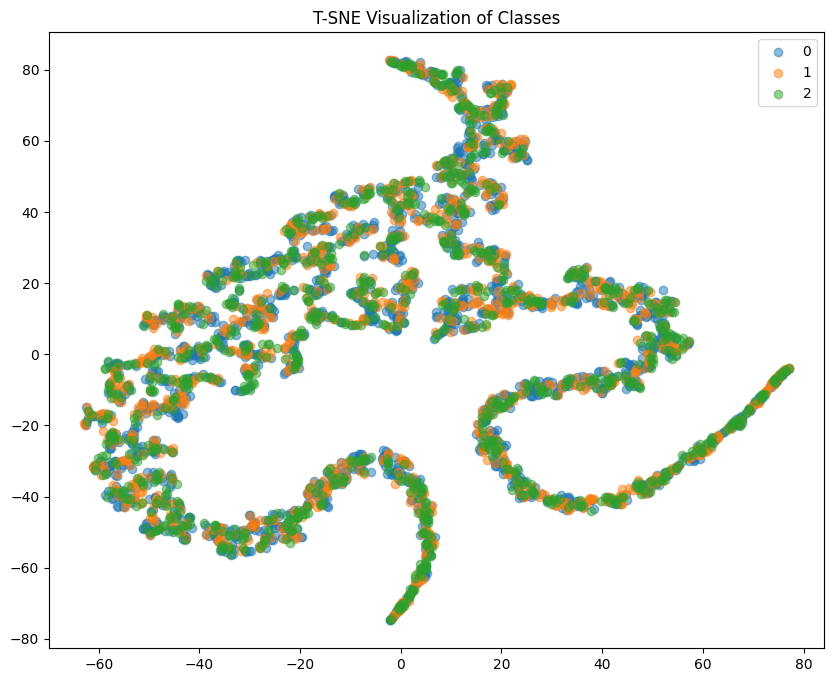

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
train_embeddings_tsne = tsne.fit_transform(train_embedding)

plt.figure(figsize=(10, 8))
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(train_embeddings_tsne[indices, 0], train_embeddings_tsne[indices, 1], label=label, alpha=0.5)
plt.legend()
plt.title('T-SNE Visualization of Classes')
plt.show()

####Upload Image

In [ ]:
from numpy import load as load_npy
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving person1619_virus_2806.jpeg to person1619_virus_2806.jpeg
User uploaded file "person1619_virus_2806.jpeg" with length 129416 bytes


Getting the result

In [ ]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.applications.vgg16 import preprocess_input

classify = ['BACTERIA', 'NORMAL', 'VIRUS']

filename = next(iter(uploaded))

img = load_img(os.path.join('/content', filename), target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

embedding_result = embedding_model.predict(img)

result = knn.predict(embedding_result)

print(f"{np.argmax(result[0])} {classify[np.argmax(result[0])]}")

1/1 [==============================] - 0s 199ms/step
0 BACTERIA


##C.Switching train and test datasets.

**Canceled**

##D.Anomaly Detection

###Presenting the data

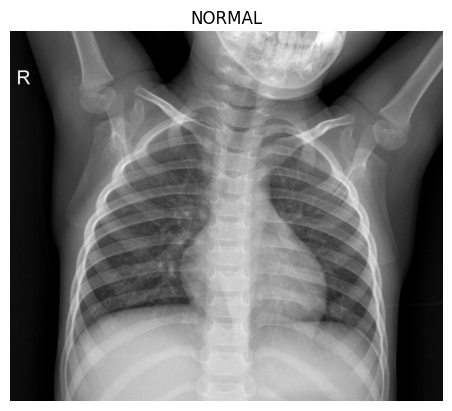

In [ ]:
normal_dir = '/content/chest_xray/train/NORMAL'

normallistTrain = os.listdir('/content/chest_xray/train/NORMAL')

#Presenting the first image of healthy lungs
imgNor = plt.imread(os.path.join(normal_dir, normallistTrain[0]))
plt.title("NORMAL")
plt.imshow(imgNor, 'gray')
plt.axis("off")
plt.show()


###Try 1

####Data Preprocessing

In [ ]:
import cv2
from keras.preprocessing.image import load_img, img_to_array

images = [img_to_array(load_img(os.path.join(normal_dir, img), target_size=(224, 224))) for img in normallistTrain]
images = np.array(images) / 255.0

#Flatten all the images for for our autoencoder approach
input_dim = np.prod(images.shape[1:])
# images = images.reshape(-1, input_dim)
images.shape

(1341, 224, 224, 3)

In [ ]:
test_dir = '/content/chest_xray/test/PNEUMONIA'
testlistTrain = os.listdir('/content/chest_xray/test/PNEUMONIA')

testImages = [img_to_array(load_img(os.path.join(test_dir, img), target_size=(224, 224))) for img in testlistTrain]
testImages = np.array(images) / 255.0

images.shape

(1341, 224, 224, 3)

####Build the network layers

In [ ]:
model = Sequential()
# Encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Flatten())

model.add(Dense(8, activation='relu'))

# Decoder
model.add(Dense(16 * 56 * 56, activation='relu'))  # Reshape layer
model.add(Reshape((56, 56, 16)))  # Reshape the output
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))


####Build the optimizer

In [ ]:
from keras.optimizers import Adam
opt = Adam(0.001)

####Compile the model

In [ ]:
model.compile(loss='mean_squared_error', optimizer=opt)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 112, 112, 16)      4624      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 56, 56, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 50176)             0         
                                                                 
 dense_36 (Dense)            (None, 8)               

####Train the model

In [ ]:
history = model.fit(images, images, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
34/34 [==============================] - 3s 36ms/step - loss: 0.0321 - val_loss: 0.0218
Epoch 2/10
34/34 [==============================] - 1s 26ms/step - loss: 0.0194 - val_loss: 0.0188
Epoch 3/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 4/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0158 - val_loss: 0.0158
Epoch 5/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 6/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0146 - val_loss: 0.0147
Epoch 7/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0137 - val_loss: 0.0142
Epoch 8/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0133 - val_loss: 0.0138
Epoch 9/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0130 - val_loss: 0.0135
Epoch 10/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0129 - val_loss: 0.0133


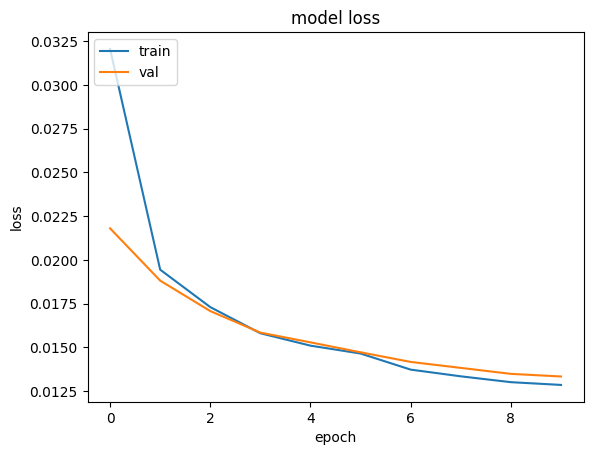

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####Test the model

testing the data

In [ ]:
x_decoded = model.predict(testImages)

42/42 [==============================] - 0s 9ms/step


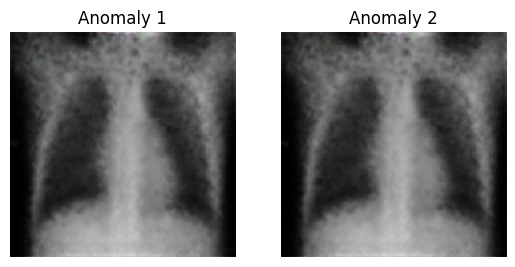

In [ ]:
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(x_decoded[i])
  plt.title(f"Anomaly {i + 1}")
  plt.axis("off")

plt.show()